1.	Load the dataset ‘patients.csv' as a dataframe df_patients

In [55]:
import pandas as pd
df_patients=pd.read_csv('patients.csv' , header=0, index_col=0)
df_patients

,Birth date,Gender,Weight,Cholestérol,Blood Pressure
Patient,,,,,
Asma,05/03/1985,F,50,Low,120/80
Salem,03/07/1965,M,120,Low,140/90
Aroua,10/05/1980,F,55,Low,110/75
Rochdi,02/01/2001,M,78,Medium,125/82
Samir,08/06/1950,M,105,High,138/87
Ramzi,05/12/1978,M,80,Medium,120/78
Louay,10/03/2010,M,60,Medium,110/80


Delete the row that correponds to 'Louay'

In [56]:
df_patients.drop('Louay', axis=0, errors='ignore', inplace=True)
df_patients

,Birth date,Gender,Weight,Cholestérol,Blood Pressure
Patient,,,,,
Asma,05/03/1985,F,50,Low,120/80
Salem,03/07/1965,M,120,Low,140/90
Aroua,10/05/1980,F,55,Low,110/75
Rochdi,02/01/2001,M,78,Medium,125/82
Samir,08/06/1950,M,105,High,138/87
Ramzi,05/12/1978,M,80,Medium,120/78


2.	Keep only the columns 'Gender', 'Birth date', Weight' columns in df_patients dataframe

In [57]:
df_patients.drop(['Cholestérol','Blood Pressure'], axis=1, errors='ignore', inplace=True)

In [58]:
df_patients

,Birth date,Gender,Weight
Patient,,,
Asma,05/03/1985,F,50
Salem,03/07/1965,M,120
Aroua,10/05/1980,F,55
Rochdi,02/01/2001,M,78
Samir,08/06/1950,M,105
Ramzi,05/12/1978,M,80


3. Normalize the Weight  'column' using this formula:
    
        weight = (weight - min)/(min - max)
        
Note : You can compute the minimum or the maximum of a column ‘A’ of a dataframe df as follows:
        
        min=df[‘A’].min() 
        max=df[‘A’].max()


In [59]:
min=df_patients['Weight'].min()
max=df_patients['Weight'].max()
df_patients['Weight']=df_patients['Weight'].apply(
                lambda weight : (weight-min)/(max-min))
df_patients

,Birth date,Gender,Weight
Patient,,,
Asma,05/03/1985,F,0.000000
Salem,03/07/1965,M,1.000000
Aroua,10/05/1980,F,0.071429
Rochdi,02/01/2001,M,0.400000
Samir,08/06/1950,M,0.785714
Ramzi,05/12/1978,M,0.428571


4. Replace 'Gender' by its OHE encoding

In [60]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(df_patients[['Gender']])
gender_encoded=pd.DataFrame(ohe.transform(df_patients[['Gender']]).toarray(),
                            columns='Gender ' + ohe.categories_[0],
                            index=df_patients.index)
df_patients=pd.concat([df_patients,gender_encoded] , axis=1)
df_patients.drop('Gender', axis=1, errors='ignore', inplace=True)
df_patients

,Birth date,Weight,Gender F,Gender M
Patient,,,,
Asma,05/03/1985,0.000000,1.0,0.0
Salem,03/07/1965,1.000000,0.0,1.0
Aroua,10/05/1980,0.071429,1.0,0.0
Rochdi,02/01/2001,0.400000,0.0,1.0
Samir,08/06/1950,0.785714,0.0,1.0
Ramzi,05/12/1978,0.428571,0.0,1.0


5. Replace 'Birth date' column by 'Young' column as follows :
- 0 if the patient age > mean(age)
- 1 else	


In [61]:
from datetime import datetime

df_patients['Birth date'] = pd.to_datetime(df_patients['Birth date'])
def age_range(date):
    age = datetime.now().year-date.year
    return age
df_patients['age']=df_patients['Birth date'].apply(age_range)

age_mean=df_patients['age'].mean()

def encode_age(age):
    if age<=age_mean:
        return 1
    else:
        return 0
df_patients['Young']=df_patients['age'].apply(encode_age)
df_patients.drop(['Birth date','age'], axis=1, errors='ignore', inplace=True)
df_patients

,Weight,Gender F,Gender M,Young
Patient,,,,
Asma,0.000000,1.0,0.0,1
Salem,1.000000,0.0,1.0,0
Aroua,0.071429,1.0,0.0,1
Rochdi,0.400000,0.0,1.0,1
Samir,0.785714,0.0,1.0,0
Ramzi,0.428571,0.0,1.0,1


6. Reduce the dimensions of the dataset using PCA (keep only 2 dimensions)

In [62]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df_patients)
X_pca=pca.transform(df_patients)
X_pca

array([[ 1.08106684, -0.17544722],
       [-0.90477554, -0.38101021],
       [ 1.05053995, -0.19184539],
       [-0.20071281,  0.54333889],
       [-0.81319487, -0.33181568],
       [-0.21292357,  0.53677962]])

7. Apply Kmeans on the resulting dataset to regroup the clients into 3 clusters

In [63]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(X_pca)
labels = km.predict(X_pca)
cluster0=X_pca[labels==0,:]
cluster1=X_pca[labels==1,:]
cluster2=X_pca[labels==2,:]

c:\Users\Polytech INTL\OneDrive - POLYTECH INTL\Desktop\IRM2_2023\AI_course\venv_ai\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8. Predict and visualize the clusters in a figure s.t. :
- Use different colors
- Show the labels

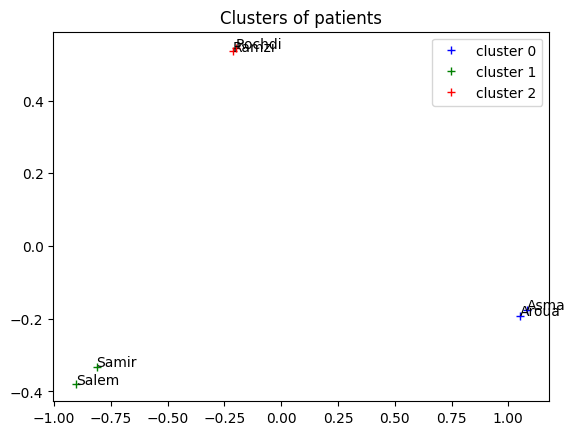

In [64]:
# Show the cluster points with differents colors (based on cluster) and + symbol 
import matplotlib.pyplot as plt

plt.plot(cluster0[:,0],cluster0[:,1],'b+', label='cluster 0')
plt.plot(cluster1[:,0],cluster1[:,1],'g+', label='cluster 1')
plt.plot(cluster2[:,0],cluster2[:,1],'r+', label='cluster 2')

for nom, x, y in zip(df_patients.index,X_pca[:,0],X_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")

plt.legend()
plt.title('Clusters of patients')
plt.show()

9. Let ‘Sallem’ be a new patient. Their informations are Gender : Male , Weight : 100, Birth date : 04/02/1968.
- Predict the cluster label of ‘Sallem’
- Visualize ‘Sallem’ and its cluster label in the figure along side the other patients


In [65]:
df_sallem = pd.DataFrame([['M', 100, '04/02/1968']], 
                        columns=['Gender','Weight','Birth date'], 
                        index=['Sallem'])
df_sallem

,Gender,Weight,Birth date
Sallem,M,100,04/02/1968


In [66]:
df_sallem['Weight']=df_sallem['Weight'].apply(
                lambda weight : (weight-min)/(max-min))
df_sallem

,Gender,Weight,Birth date
Sallem,M,0.714286,04/02/1968


In [67]:
gender_encoded=pd.DataFrame(ohe.transform(df_sallem[['Gender']]).toarray(),
                            columns='Gender ' + ohe.categories_[0],
                            index=['Sallem'])
df_sallem=pd.concat([df_sallem,gender_encoded] , axis=1)
df_sallem.drop('Gender', axis=1, errors='ignore', inplace=True)
df_sallem

,Weight,Birth date,Gender F,Gender M
Sallem,0.714286,04/02/1968,0.0,1.0


In [68]:
df_sallem['Birth date'] = pd.to_datetime(df_sallem['Birth date'])
df_sallem['age']=df_sallem['Birth date'].apply(age_range)

df_sallem['Young']=df_sallem['age'].apply(encode_age)
df_sallem.drop(['Birth date','age'], axis=1, errors='ignore', inplace=True)
df_sallem

,Weight,Gender F,Gender M,Young
Sallem,0.714286,0.0,1.0,0


In [69]:
X_pca_sallem=pca.transform(df_sallem)
X_pca_sallem

array([[-0.78266798, -0.31541751]])

In [70]:
label_sallem = km.predict(X_pca_sallem)
label_sallem

array([1])

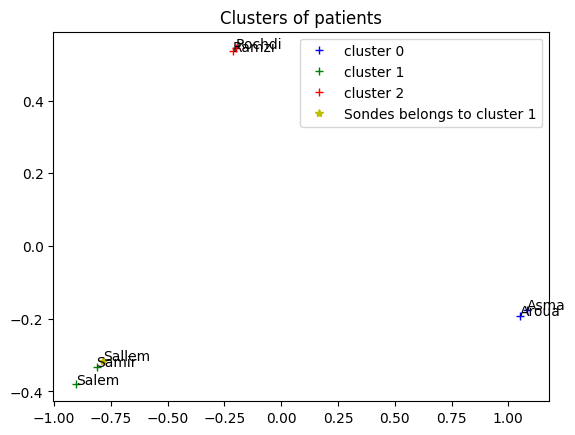

In [72]:
# plot clients data points
plt.plot(cluster0[:,0],cluster0[:,1],'b+', label='cluster 0')
plt.plot(cluster1[:,0],cluster1[:,1],'g+', label='cluster 1')
plt.plot(cluster2[:,0],cluster2[:,1],'r+', label='cluster 2')
plt.plot(X_pca_sallem[0,0],X_pca_sallem[0,1],'y*', label='Sondes belongs to cluster '+str(label_sallem[0]))

# annotation of clients names
for nom, x, y in zip(df_patients.index,X_pca[:,0],X_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")

plt.annotate('Sallem', xy =(X_pca_sallem[0,0], X_pca_sallem[0,1]), xycoords="data")

plt.legend()
plt.title('Clusters of patients')
plt.show()